### Imports


In [219]:
# Biliotecas genéricas úteis no tratamento e exibição dos dados
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Bibliotecas do pacote sklearn para o tratamento de dados, treinamento e avaliação dos modelos.
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#Bibliotecas específicas para cada modelo utilizado

#DecesionTree
from sklearn.tree import DecisionTreeClassifier

#SVC
from sklearn.svm import SVC

#KNC
from sklearn.neighbors import KNeighborsClassifier

### Preparação dos dados

#### Visualização dos dados

In [220]:
#Primeiro, vamos abrir o arquivo CSV
df = pd.read_csv("pulsar_data_train.csv")

# Vamos analisar as primeiras 10 linhas
df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [221]:
# Exibindo a correlação entre os dados, apenas para fins de curiosidade.
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.551105,-0.872595,-0.737598,-0.298123,-0.313845,0.235781,0.146782,-0.676129
Standard deviation of the integrated profile,0.551105,1.000000,-0.527779,-0.539896,-0.001656,-0.058241,0.031671,0.028757,-0.365757
Excess kurtosis of the integrated profile,-0.872595,-0.527779,1.000000,0.944648,0.414739,0.439037,-0.341394,-0.214991,0.791661
Skewness of the integrated profile,-0.737598,-0.539896,0.944648,1.000000,0.412659,0.420058,-0.328675,-0.204148,0.707086
Mean of the DM-SNR curve,-0.298123,-0.001656,0.414739,0.412659,1.000000,0.797974,-0.616385,-0.353898,0.400375
Standard deviation of the DM-SNR curve,-0.313845,-0.058241,0.439037,0.420058,0.797974,1.000000,-0.808061,-0.574594,0.497210
Excess kurtosis of the DM-SNR curve,0.235781,0.031671,-0.341394,-0.328675,-0.616385,-0.808061,1.000000,0.924264,-0.389788
Skewness of the DM-SNR curve,0.146782,0.028757,-0.214991,-0.204148,-0.353898,-0.574594,0.924264,1.000000,-0.259065
target_class,-0.676129,-0.365757,0.791661,0.707086,0.400375,0.497210,-0.389788,-0.259065,1.000000


#### Tratamento e divisão dos dados

In [222]:
# Removendo valores NaN (Not a Number) do dataset, para evitar erros nos treinamentos dos modelos
df.dropna(inplace=True)

In [223]:
# Definindo o X (input) e y (output) para o treinamento dos modelos. O 'X' considera todo o dataset, exceto pela coluna 'target_class', enquanto o 'y' é justamente a
# coluna 'target_class', que é o que pretendemos adivinhar com os modelos de machine learning.
 
X = df.drop("target_class",axis=1)
y = df["target_class"]

In [224]:
'''
Dividindo o conjunto de dados para treinamento e teste. Os dados de treinamento, como o nome sugere, são utilizados para treinar o modelo, enquanto os dados de
teste são utilizados para avaliar o modelo.

Parâmetros: 

- random_state: Um valor específico para garantir a reprodutibilidade da divisão do conjunto de dados. Se você fornecer o mesmo valor em execuções diferentes,
a divisão será sempre a mesma. Isso é útil para resultados consistentes em diferentes execuções do código. O valor exato escolhido não importa, contanto que
seja o mesmo sempre que você executar o código.

- test_size: Define a proporção de dados para treino e teste. Nesse caso, será utilizado 70% para treino e 30% para teste.

- shuffle: Indica se os dados devem ser embaralhados antes da divisão. Se shuffle=True, os dados serão embaralhados aleatoriamente antes de dividir,
garantindo uma distribuição aleatória entre os conjuntos de treinamento e teste.

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.3, shuffle=True)

In [225]:
# Padronizando os dados
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### SVC

In [226]:
# Definindo um dataframe para exibir posteriorment os resultados
result = pd.DataFrame(columns=["Kernel", "Regularisation", "Accuracy", "Precision", "Recall", "F1 Score"])

In [227]:
'''
Definição de valores para regularizações (penalidades para coeficientes) e kernels (funções de similaridade).

-Regularizações: controlam a complexidade do modelo e previnem sobreajuste.

-Kernels: afetam como o SVM realiza a classificação, com opções como polinomial, gaussiano, sigmoide e linear.
'''

regularisations = [0.1, 1, 10, 50, 100]
kernels = ["poly", "rbf", 'linear', 'sigmoid']

In [228]:
regularisations = [0.1, 1, 10, 100]
kernels = ["poly", "rbf"]

# Iteração sobre diferentes regularizações e kernels
for c in regularisations :
    for k in kernels : 
        # Verifica se o kernel é polinomial
        if k == "poly" :
            # Loop para diferentes graus do kernel polinomial
            for d in range(2) :
                # Criação de um modelo SVM com os parâmetros especificados
                svc = SVC(C = c, kernel = k, degree = d+1)
                # Treinamento do modelo no conjunto de treinamento
                svc.fit(X_train, y_train)
                # Predição no conjunto de teste
                y_pred = svc.predict(X_test)
                
                # Avaliação do desempenho do modelo
                acc = accuracy_score(y_test, y_pred)
                pre = precision_score(y_test, y_pred)
                rec = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                
                # Criação de um novo registro para o DataFrame de resultados
                new_row = {'Kernel': k + "-" + str(d+1), 'Regularisation': c, 'Accuracy': acc, 
                           'Precision': pre, 'Recall': rec, 'F1 Score': f1}
                # Atualização do DataFrame de resultados
                result = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)
            
        else :
            # Criação de um modelo SVM com os parâmetros especificados
            svc = SVC(C = c, kernel = k)
            # Treinamento do modelo no conjunto de treinamento
            svc.fit(X_train, y_train)
            # Predição no conjunto de teste
            y_pred = svc.predict(X_test)
            
            # Avaliação do desempenho do modelo
            acc = accuracy_score(y_test, y_pred)
            pre = precision_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            
            # Criação de um novo registro para o DataFrame de resultados
            new_row = {'Kernel': k, 'Regularisation': c, 'Accuracy': acc, 
                       'Precision': pre, 'Recall': rec, 'F1 Score': f1}
            # Atualização do DataFrame de resultados
            result = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)


/tmp/ipykernel_3889/2695312451.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)


In [229]:
# Mostrando o resultado obtido para as diferentes combinações de parâmetros
result

,Kernel,Regularisation,Accuracy,Precision,Recall,F1 Score
0,poly-1,0.1,0.975917,0.959799,0.764,0.850780
1,poly-2,0.1,0.970884,0.977401,0.692,0.810304
2,rbf,0.1,0.974838,0.963918,0.748,0.842342
3,poly-1,1.0,0.978792,0.956938,0.800,0.871460
4,poly-2,1.0,0.974119,0.978495,0.728,0.834862
5,rbf,1.0,0.979152,0.952830,0.808,0.874459
6,poly-1,10.0,0.980590,0.949541,0.828,0.884615
7,poly-2,10.0,0.974119,0.945000,0.756,0.840000
8,rbf,10.0,0.978792,0.924444,0.832,0.875789
9,poly-1,100.0,0.980230,0.949309,0.824,0.882227


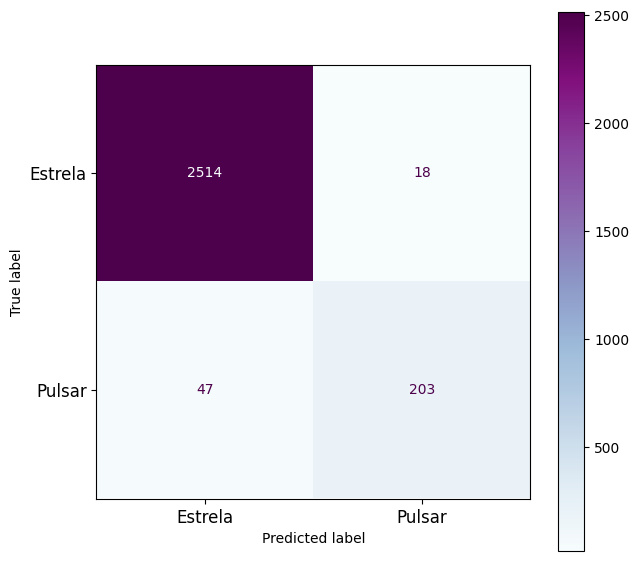

In [230]:
#Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=12)

### KNC

In [231]:
# Treinamento do Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Escolha o número adequado de vizinhos
knn_model.fit(X_train, y_train)

# Avaliação do Modelo
knn_y_pred = knn_model.predict(X_test)

In [232]:
# Métricas de Avaliação do Modelo KNN
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1_score = f1_score(y_test, knn_y_pred)

# Exibição das Métricas para o Modelo KNN
print("Métricas para o Modelo KNN:")
print(f"Acurácia: {knn_accuracy}")
print(f"Precisão: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1_score}")

Métricas para o Modelo KNN:
Acurácia: 0.9755571531272466
Precisão: 0.90625
Recall: 0.812
F1 Score: 0.8565400843881857


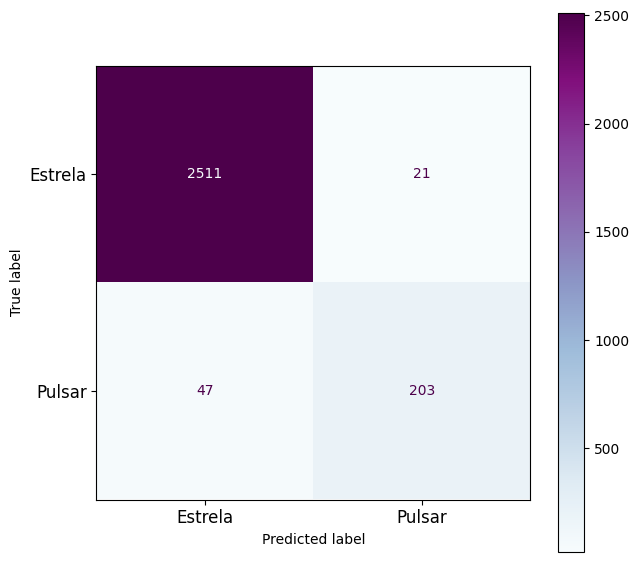

In [233]:
#Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred , labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=12)


### Decision Tree Classifier

In [234]:
# Transformando as classes em números
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

In [235]:
'''
- Splitter: "best" indica que utilizaremos a melhor separação possível para os dados

- Criterion: "entropy" indica que a árvore irá buscar ter sempre apenas uma classe dentro de cada folha
de forma que isso indicaria uma entropia igual a 0

- max_depth:  é um dos critérios para evitar overfitting, ele exige que a árvore tenha no máximo 4 profundidades
'''

dtc = DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 4)

# Treinando as Árvores de Decisão
dtc = dtc.fit(X_train, y_train)

# Fazendo as previsões utilizando o nosso conjunto teste
dt_y_pred = dtc.predict(X_test)


In [236]:
# Métricas de Avaliação do Modelo Árvore de Decisão
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1_score = f1_score(y_test, dt_y_pred)

# Exibição das Métricas para o Modelo Árvore de Decisão
print("Métricas para o Modelo Árvore de Decisão:")
print(f"Acurácia: {dt_accuracy}")
print(f"Precisão: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1_score}")

Métricas para o Modelo Árvore de Decisão:
Acurácia: 0.9716031631919483
Precisão: 0.8352941176470589
Recall: 0.852
F1 Score: 0.8435643564356436


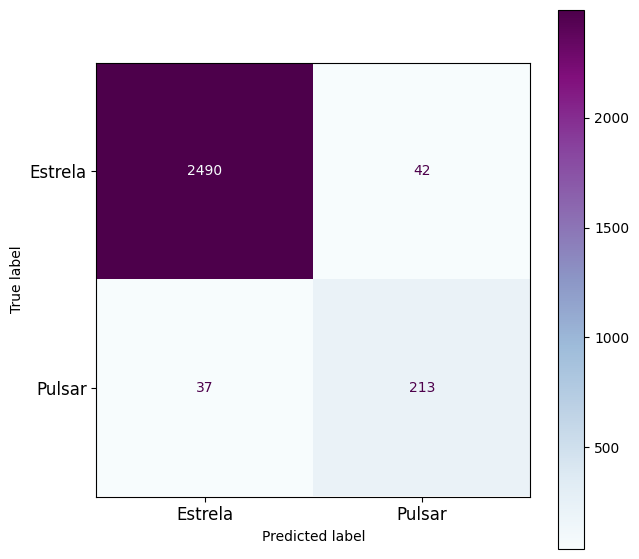

In [237]:
# Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_pred, labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=12)

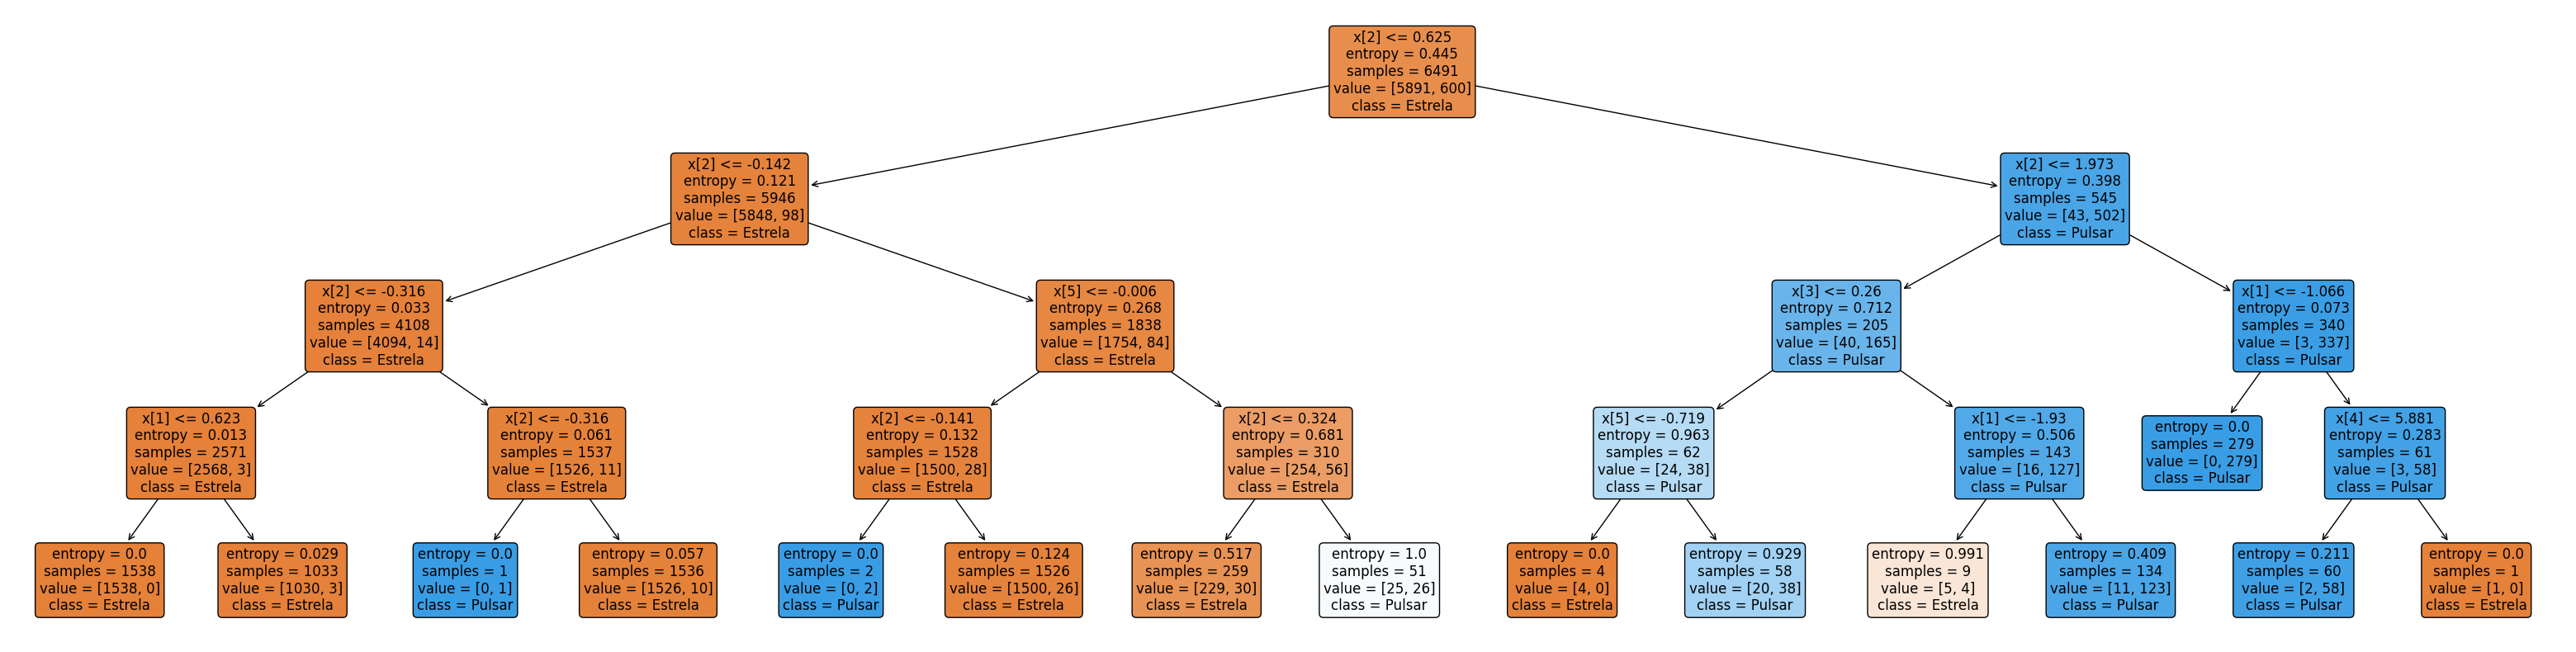

In [238]:
#Código para plotar a árvore

from sklearn.tree import plot_tree

plt.figure(figsize=(40, 10))
plot_tree(
    dtc,
    filled=True,
    class_names=["Estrela", "Pulsar"],
    rounded=True,
    fontsize = 12
)
plt.show()

### Adicional

#### Gerando os dados

**Atenção** - É necessário rodar as células "Imports" e "Preparação dos dados" para adicionar as dependências e realizar o tratamento dos dados antes de seguir com o processo aqui. Caso já tenha rodado para visualizar o treinamento dos modelos acima, não é necessário rodar novamente.

In [239]:
# Supondo que features seja uma lista das colunas (exceto a coluna alvo 'classe')
df_columns = X.columns.tolist()

# Gere combinações de colunas
columns_combination = []
for r in range(1, len(df_columns) + 1):
    combinations_r = combinations(df_columns, r)
    columns_combination.extend(combinations_r)
    
print(f'Quantidades total de combinações diferentes de tabelas para treinamento: {len(columns_combination)}')

final_result= []

Quantidades total de combinações diferentes de tabelas para treinamento: 255


#### KNC

In [240]:
# Lista para armazenar os resultados
results_list = []

# Iteração sobre as combinações
for combination in columns_combination:
    features_subset = X[list(combination)]
    X_subset = features_subset.values

    # Divisão do Conjunto de Dados
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=104)

    # Normalização dos Dados
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Treinamento do Modelo KNC
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)

    # Avaliação do Modelo
    y_pred = knn_model.predict(X_test)

    # Métricas
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Armazenar resultados
    results_list.append({
        'Features': combination,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

# Ordenar a lista pelos melhores resultados (maiores F1 Scores)
results_list.sort(key=lambda x: x['F1 Score'], reverse=True)


Top 1 Result - Features: (' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Standard deviation of the DM-SNR curve')


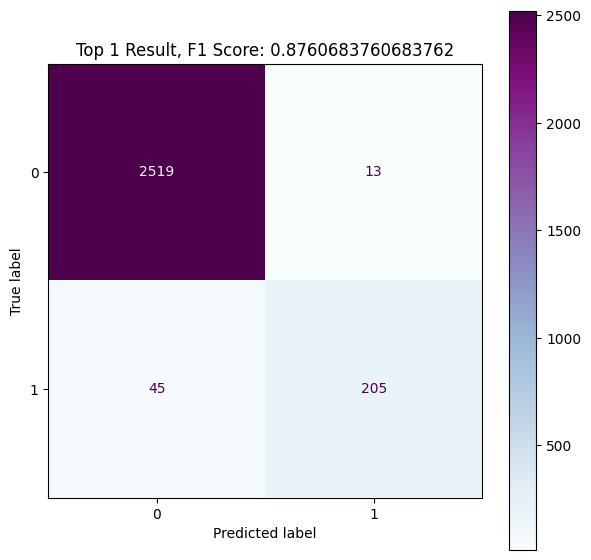


Top 2 Result - Features: (' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Standard deviation of the DM-SNR curve', ' Skewness of the DM-SNR curve')


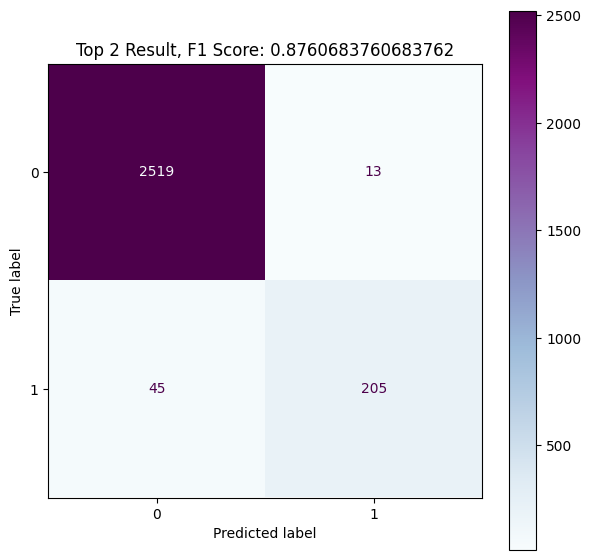


Top 3 Result - Features: (' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Standard deviation of the DM-SNR curve')


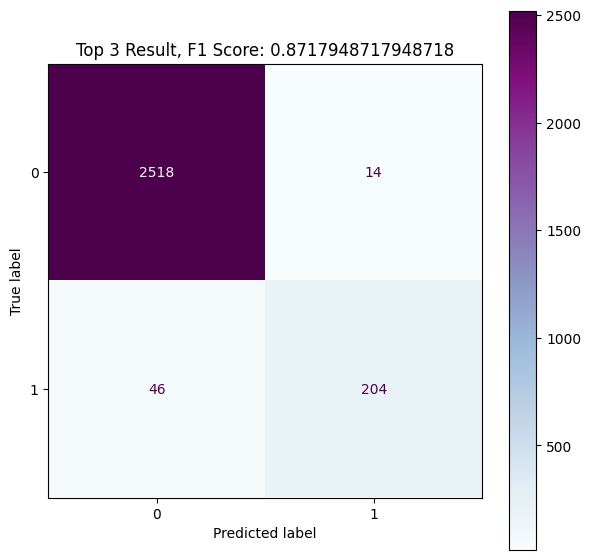

In [241]:
# Análise dos 3 Melhores Resultados
top_3_results = results_list[:3]
for i, result in enumerate(top_3_results, start=1):
    
    # Plota as colunas utilizadas no treinamento
    print(f"\nTop {i} Result - Features: {result['Features']}")
    
    # Adiciona o conjunto de features em uma lista
    final_result.append(result['Features'])

    # Plotar a Matriz de Confusão
    fig, ax = plt.subplots(figsize=(7, 7))
    ConfusionMatrixDisplay(confusion_matrix=result['Confusion Matrix'], display_labels=['0', '1']).plot(cmap='BuPu', ax=ax)
    plt.title(f"Top {i} Result, F1 Score: {result['F1 Score']}")
    plt.show()

#### SVC

In [242]:
from sklearn.svm import SVC

# Lista para armazenar os resultados do SVC
svc_results_list = []

# Iteração sobre as combinações
for combination in columns_combination:
    features_subset = X[list(combination)]
    X_subset = features_subset.values

    # Divisão do Conjunto de Dados
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=104)

    # Normalização dos Dados (Opcional)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Treinamento do Modelo SVC
    svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Você pode ajustar os hiperparâmetros conforme necessário
    svc_model.fit(X_train, y_train)

    # Avaliação do Modelo
    y_pred_svc = svc_model.predict(X_test)

    # Métricas
    f1_svc = f1_score(y_test, y_pred_svc)
    cm_svc = confusion_matrix(y_test, y_pred_svc)

    # Armazenar resultados
    svc_results_list.append({
        'Features': combination,
        'F1 Score': f1_svc,
        'Confusion Matrix': cm_svc
    })

# Ordenar a lista pelos melhores resultados (maiores F1 Scores)
svc_results_list.sort(key=lambda x: x['F1 Score'], reverse=True)



Top 1 Result - Features: (' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Skewness of the DM-SNR curve')


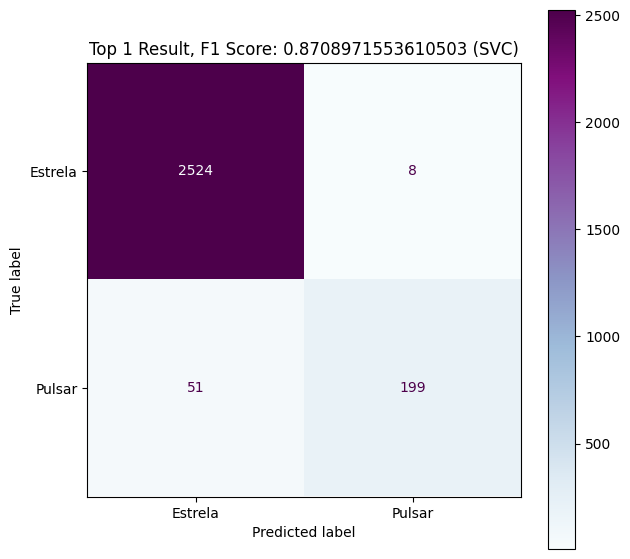


Top 2 Result - Features: (' Mean of the integrated profile', ' Excess kurtosis of the integrated profile', ' Excess kurtosis of the DM-SNR curve')


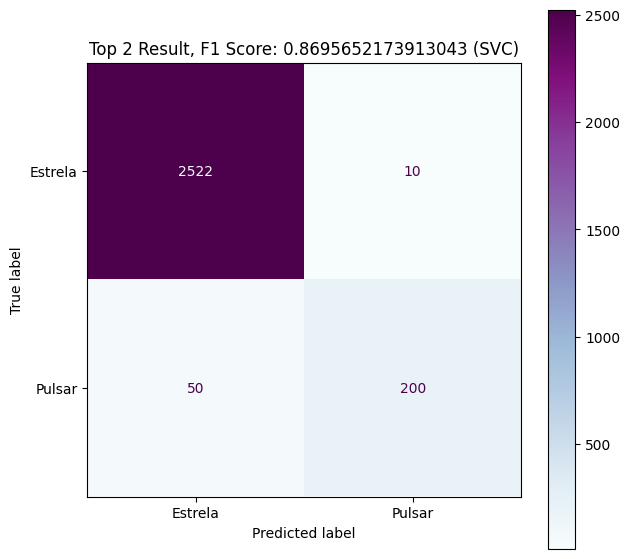


Top 3 Result - Features: (' Mean of the integrated profile', ' Excess kurtosis of the integrated profile', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve')


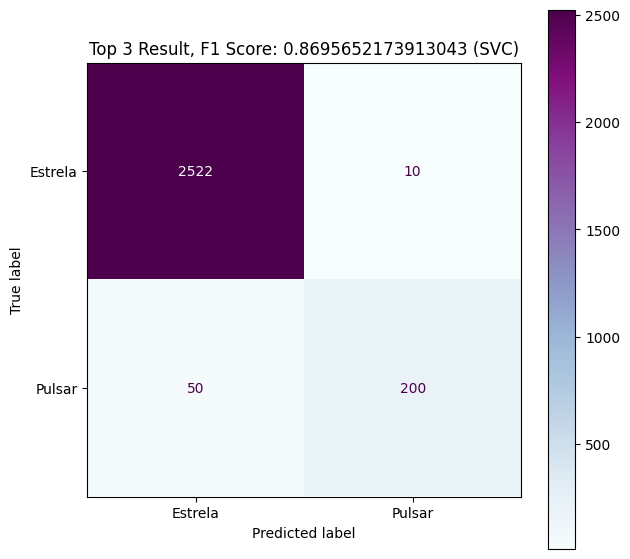

In [243]:
# Análise dos 3 Melhores Resultados
top_svc_results = svc_results_list[:3]
for i, result in enumerate(top_svc_results, start=1):
    
    # Plota as colunas utilizadas no treinamento
    print(f"\nTop {i} Result - Features: {result['Features']}")
    
    # Adiciona o conjunto de features em uma lista
    final_result.append(result['Features'])
    
    # Plota a Matriz de Confusão
    fig, ax = plt.subplots(figsize=(7, 7))
    ConfusionMatrixDisplay(confusion_matrix=result['Confusion Matrix'], display_labels=['Estrela','Pulsar']).plot(cmap='BuPu', ax=ax)
    plt.title(f"Top {i} Result, F1 Score: {result['F1 Score']} (SVC)")
    plt.show()

#### Decision Tree Classifier

In [244]:
# Lista para armazenar os resultados da Decision Tree
dtc_results_list = []

# Iteração sobre as combinações
for combination in columns_combination:
    features_subset = X[list(combination)]
    X_subset = features_subset.values

    # Divisão do Conjunto de Dados
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=104)

    # Treinamento do Modelo Decision Tree
    dt_model = DecisionTreeClassifier()  # Você pode ajustar os hiperparâmetros conforme necessário
    dt_model.fit(X_train, y_train)

    # Avaliação do Modelo
    y_pred_dtc = dt_model.predict(X_test)

    # Métricas
    f1_dtc= f1_score(y_test, y_pred_dtc)
    cm_dtc = confusion_matrix(y_test, y_pred_dtc)

    # Armazenar resultados
    dtc_results_list.append({
        'Features': combination,
        'F1 Score': f1_dtc,
        'Confusion Matrix': cm_dtc
    })

# Ordenar a lista pelos melhores resultados
dtc_results_list.sort(key=lambda x: x['F1 Score'], reverse=True)


Top 1 Result - Features: (' Mean of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile')


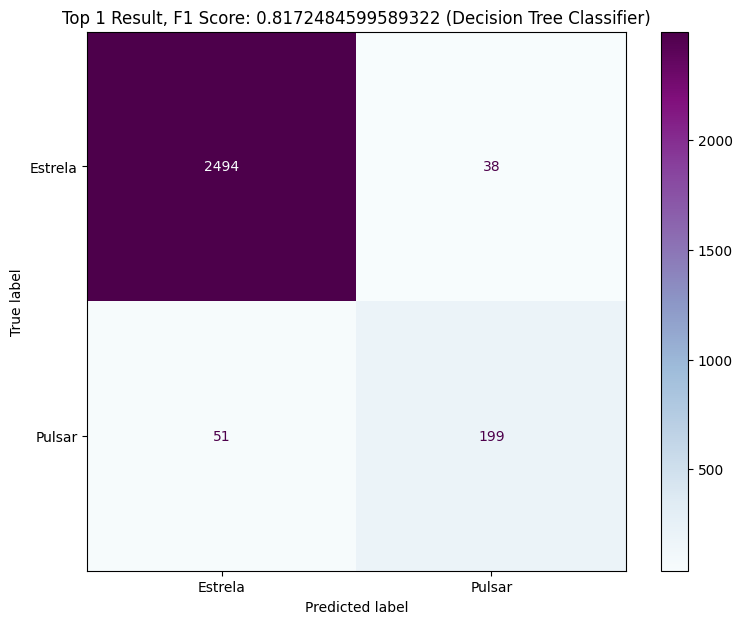


Top 2 Result - Features: (' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve')


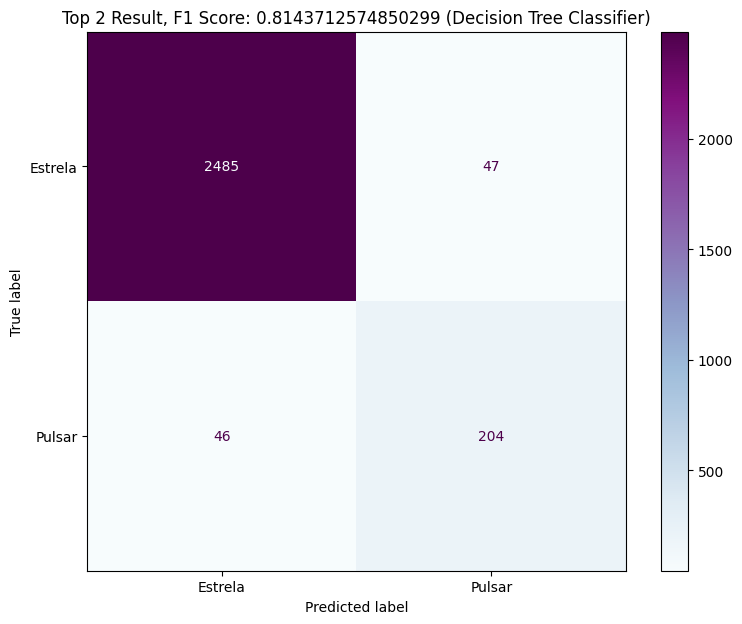


Top 3 Result - Features: (' Mean of the integrated profile', ' Excess kurtosis of the integrated profile', ' Standard deviation of the DM-SNR curve')


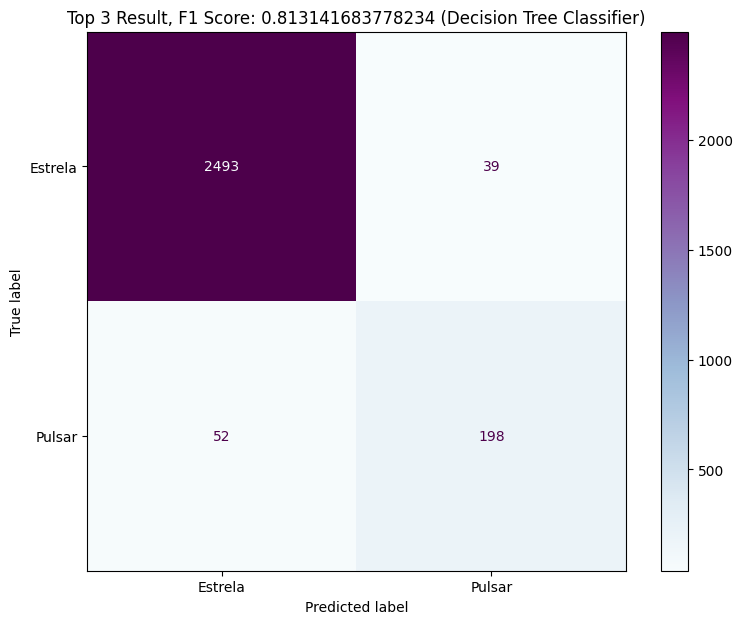

In [245]:
# Análise dos 3 Melhores Resultados
top_dtc_results = dtc_results_list[:3]
for i, result in enumerate(top_dtc_results, start=1):
    # Plota as colunas utilizadas no treinamento
    print(f"\nTop {i} Result - Features: {result['Features']}")
    
    # Adiciona o conjunto de features em uma lista
    final_result.append(result['Features'])
    
    # Plota a Matriz de Confusão
    fig, ax = plt.subplots(figsize=(9, 7))
    ConfusionMatrixDisplay(confusion_matrix=result['Confusion Matrix'], display_labels=['Estrela', 'Pulsar']).plot(cmap='BuPu', ax=ax)
    plt.title(f"Top {i} Result, F1 Score: {result['F1 Score']} (Decision Tree Classifier)")
    plt.show()

#### Conclusão

Vimos acima que, dependendo do algoritmo utilizado, diferentes conjuntos de features apresentaram os melhores resultados. Entretando, algumas features foram mais presentes, mesmo em diferentes algoritmos, do que outras. Abaixo, mostro uma relação geral das features mais repetidas considerando os três melhores resultados dos três modelos. 

In [246]:
# Flatten da lista (Transformar cada sub índice em um índice individual) para ter todas as features em uma única lista
all_features = [feature for feature_set in final_result for feature in feature_set]

# Contagem das features
feature_counts = Counter(all_features)

# Exibir as features mais presentes em ordem
print("Features mais presentes nos treinamentos dos modelos que alcançaram os melhores resultados:")
for feature, count in feature_counts.most_common():
    print(f"A feature {feature} repetiu {count} vezes.")

Features mais presentes nos treinamentos dos modelos que alcançaram os melhores resultados:
A feature  Excess kurtosis of the integrated profile repetiu 9 vezes.
A feature  Standard deviation of the integrated profile repetiu 5 vezes.
A feature  Standard deviation of the DM-SNR curve repetiu 5 vezes.
A feature  Mean of the integrated profile repetiu 5 vezes.
A feature  Skewness of the DM-SNR curve repetiu 4 vezes.
A feature  Skewness of the integrated profile repetiu 4 vezes.
A feature  Excess kurtosis of the DM-SNR curve repetiu 3 vezes.
A feature  Mean of the DM-SNR curve repetiu 1 vezes.
